In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
!pip install openpyxl

In [ ]:
df=pd.read_excel("/content/Activation Function.xlsx")

In [ ]:
df.head()

,Input,Output
0,0,1
1,1,6
2,2,11
3,3,16
4,4,21


In [ ]:
df.describe()

,Input,Output
count,20.00000,20.000000
mean,9.50000,48.500000
std,5.91608,29.580399
min,0.00000,1.000000
25%,4.75000,24.750000
50%,9.50000,48.500000
75%,14.25000,72.250000
max,19.00000,96.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Input   20 non-null     int64
 1   Output  20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes


In [ ]:
X=df[["Input"]].values
Y=df[["Output"]].values

In [ ]:
xtrain,xtest,ytrain,ytest=tts(X,Y,test_size=0.3,random_state=0)

In [ ]:
scaler=MinMaxScaler()
scaler.fit(xtrain)
xtrainscaled=scaler.transform(xtrain)
xtestscaled=scaler.transform(xtest)

In [ ]:
model=Sequential([Dense(units=4,activation='relu',input_shape=[1]),
                  Dense(units=6,activation='relu'),
                  Dense(units=4,activation='relu'),
                  Dense(units=1)])
model.compile(optimizer='rmsprop',loss='mse')
model.fit(xtrainscaled,ytrain,epochs=2500)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 1s 600ms/step - loss: 2460.8064
Epoch 2/2500
1/1 [==============================] - 0s 6ms/step - loss: 2459.4158
Epoch 3/2500
1/1 [==============================] - 0s 6ms/step - loss: 2458.3862
Epoch 4/2500
1/1 [==============================] - 0s 5ms/step - loss: 2457.5134
Epoch 5/2500
1/1 [==============================] - 0s 6ms/step - loss: 2456.7310
Epoch 6/2500
1/1 [==============================] - 0s 5ms/step - loss: 2456.0073
Epoch 7/2500
1/1 [==============================] - 0s 5ms/step - loss: 2455.3276
Epoch 8/2500
1/1 [==============================] - 0s 5ms/step - loss: 2454.6763
Epoch 9/2500
1/1 [==============================] - 0s 5ms/step - loss: 2454.0469
Epoch 10/2500
1/1 [==============================] - 0s 5ms/step - loss: 2453.4375
Epoch 11/2500
1/1 [==============================] - 0s 5ms/step - loss: 2452.8435
Epoch 12/2500
1/1 [==============================] - 0s 

<Axes: >

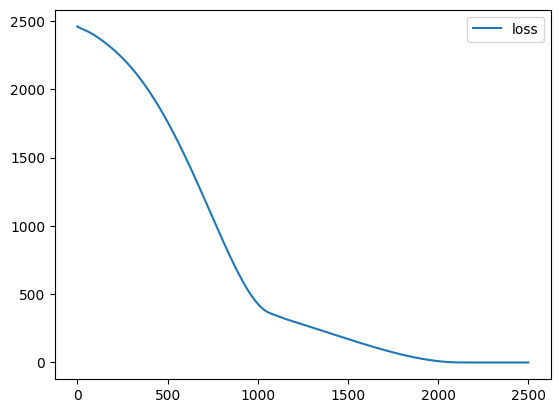

In [ ]:
loss=pd.DataFrame(model.history.history)
loss.plot()

In [ ]:
model.evaluate(xtestscaled,ytest)

1/1 [==============================] - 0s 126ms/step - loss: 0.0073


0.007342005614191294

In [ ]:
p=[[5]]

In [ ]:
pscale= scaler.transform(p)

In [ ]:
model.predict(pscale)

1/1 [==============================] - 0s 88ms/step


array([[26.049587]], dtype=float32)